In [14]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings("ignore")


In [15]:
data = pd.read_csv("dailysales.csv",parse_dates=["date"])
data.head()

,date,sales
0,2018-01-01,477.0
1,2018-01-02,365.0
2,2018-01-03,442.0
3,2018-01-04,490.0
4,2018-01-05,396.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    704 non-null    datetime64[ns]
 1   sales   704 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.1 KB


In [17]:
data.isna().sum()


date     0
sales    0
dtype: int64

In [18]:
# setting date as index
data = data.set_index("date")
data.head()

,sales
date,
2018-01-01,477.0
2018-01-02,365.0
2018-01-03,442.0
2018-01-04,490.0
2018-01-05,396.0


In [19]:
# data structure required for time series
data= data.groupby("date").sum()
data.head()

,sales
date,
2018-01-01,477.0
2018-01-02,365.0
2018-01-03,442.0
2018-01-04,490.0
2018-01-05,396.0


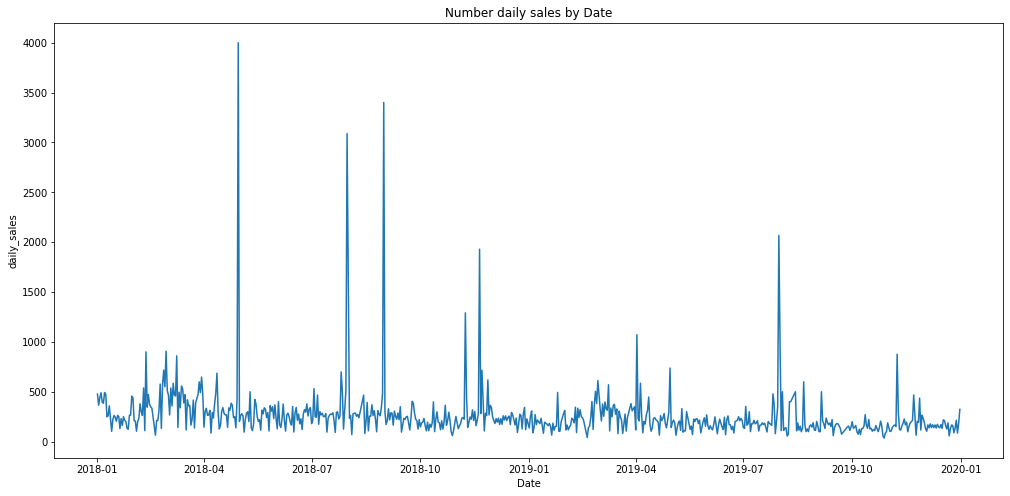

In [20]:
# visualizing the data
plt.figure(figsize=(17,8))
plt.plot(data)
plt.xlabel("Date")
plt.ylabel("daily_sales")
plt.title("Number daily sales by Date")
plt.show()

In [21]:
# daily to monthly
# aggregating the data to month start

data = data.resample(rule="MS").sum()

In [22]:
data.head()

,sales
date,
2018-01-01,9035.0
2018-02-01,9571.0
2018-03-01,13143.0
2018-04-01,12427.0
2018-05-01,8133.0


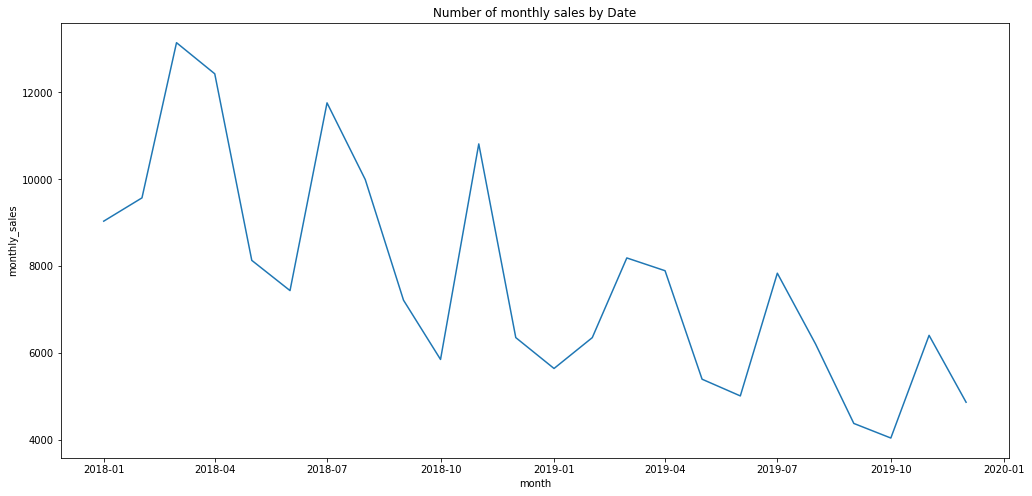

In [23]:
# visualizing the data
plt.figure(figsize=(17,8))
plt.plot(data)
plt.xlabel("month")
plt.ylabel("monthly_sales")
plt.title("Number of monthly sales by Date")
plt.show()

In [24]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

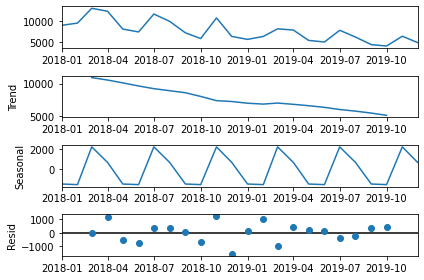

In [26]:

seasonal_decompose(data,model="additive",period=4).plot()
plt.show()

In [29]:
# Train test split
train = data[:19]
test = data[19:]

In [30]:
train.head()

,sales
date,
2018-01-01,9035.0
2018-02-01,9571.0
2018-03-01,13143.0
2018-04-01,12427.0
2018-05-01,8133.0


In [31]:
test.head()

,sales
date,
2019-08-01,6207.00
2019-09-01,4379.25
2019-10-01,4043.45
2019-11-01,6406.95
2019-12-01,4867.25


In [32]:
# import the Holt Winters Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [33]:
hwmodel = ExponentialSmoothing(train.sales,trend="add", seasonal="mul",seasonal_periods = 4).fit()

In [34]:
test_pred = hwmodel.forecast(5)
test_pred

2019-08-01    6037.856757
2019-09-01    4130.499087
2019-10-01    3935.889674
2019-11-01    5994.989512
2019-12-01    4928.574236
Freq: MS, dtype: float64

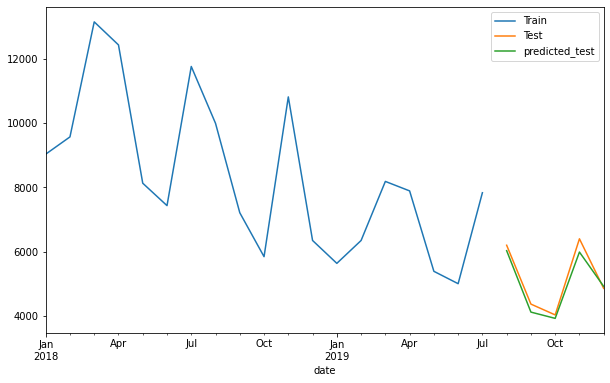

In [37]:
# visulizing the train and test and prediction data
train["sales"].plot(legend=True,label="Train",figsize=(10,6))
test["sales"].plot(legend=True,label="Test")
test_pred.plot(legend=True, label = "predicted_test")
plt.legend(loc="best")
plt.show()

In [40]:
# model evalutation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test,test_pred)
print("mse: ",mse)
rmse = np.sqrt(mse)
print("rmse : ",rmse)

mse:  55105.55653224138
rmse :  234.74572739933177


In [41]:
data.sales.mean(), np.sqrt(data.sales.var())

(7665.204166666666, 2549.757117414906)

In [43]:
final_model = ExponentialSmoothing(data.sales,trend="add", seasonal="mul", seasonal_periods=4).fit()


In [44]:
pred = final_model.forecast(4)

In [45]:
pred

2020-01-01    3534.220106
2020-02-01    3328.416965
2020-03-01    4973.216008
2020-04-01    4033.117113
Freq: MS, dtype: float64

<AxesSubplot:xlabel='date'>

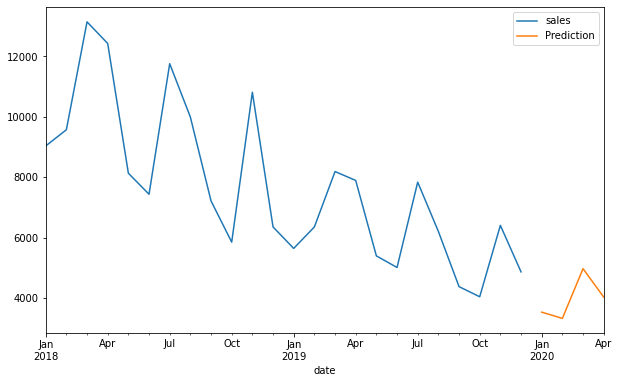

In [48]:
data["sales"].plot(legend=True, label="sales", figsize = (10,6))
pred.plot(legend=True, label="Prediction")